## DFO Nutrient Comparison

In [1]:
import sqlalchemy
from sqlalchemy import (create_engine, Column, String, Integer, Float, MetaData, 
                        Table, type_coerce, ForeignKey, case)
from sqlalchemy.orm import mapper, create_session, relationship, aliased, Session
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import case
import numpy as np
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import sqlalchemy.types as types
from sqlalchemy.sql import and_, or_, not_, func
from sqlalchemy.sql import select
import os
from os.path import isfile
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import datetime as dt
import glob
import gsw
import pickle

%matplotlib inline

In [2]:
PATH= '/results/SalishSea/hindcast.201905/'
start_date = dt.datetime(2017,1,1)
end_date = dt.datetime(2017,12,31)
flen=1
namfmt='nowcast'
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T','vosaline':'grid_T','votemper':'grid_T'}
fdict={'ptrc_T':1,'grid_T':1}

df1=et.loadDFO(datelims=(start_date,end_date))#,excludeSaanich=False)
df1.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
0,2017.0,2.0,19.0,7.132222,48.5,-124.735667,1.0,1.0,None,None,1.12,mg/m^3,9.52,26.96,umol/L,29.283488,8.521459,1.0,2017-02-19 07:07:56
1,2017.0,2.0,19.0,7.132222,48.5,-124.735667,5.6,5.6,None,None,NaN,mg/m^3,9.53,26.88,umol/L,29.298387,8.525728,5.6,2017-02-19 07:07:56
2,2017.0,2.0,19.0,7.132222,48.5,-124.735667,9.9,9.9,None,None,0.95,mg/m^3,9.70,26.49,umol/L,29.333996,8.535950,9.9,2017-02-19 07:07:56
3,2017.0,2.0,19.0,7.132222,48.5,-124.735667,20.1,19.9,None,None,0.64,mg/m^3,11.34,25.35,umol/L,30.465823,8.475745,19.9,2017-02-19 07:07:56
4,2017.0,2.0,19.0,7.132222,48.5,-124.735667,30.0,29.7,None,None,NaN,mg/m^3,12.35,26.16,umol/L,30.628528,8.401070,29.7,2017-02-19 07:07:56


(array([192.,  20., 545.,  16.,   0., 571.,  84.,  77.,  78., 301.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

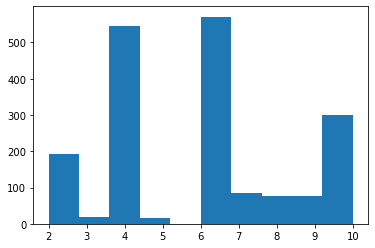

In [3]:
plt.hist(df1.Month)

In [ ]:
data=et.matchData(df1,filemap, fdict, start_date, end_date, namfmt, PATH, flen)
pickle.dump(data,open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataDFO1905_2017.pkl','wb'))

(Lat,Lon)= 49.0425 -125.151  not matched to domain
(Lat,Lon)= 49.070166666666665 -125.15616666666666  not matched to domain
(Lat,Lon)= 49.70747 -123.72357  not matched to domain
(Lat,Lon)= 50.4882 -126.3484  not matched to domain
(Lat,Lon)= 50.6318 -126.4979  not matched to domain
(Lat,Lon)= 50.8046 -126.5291  not matched to domain
(Lat,Lon)= 50.8762 -126.6183  not matched to domain
(Lat,Lon)= 50.9086 -126.5451  not matched to domain


In [ ]:
data.head()

In [6]:
data.loc[data.Chlorophyll_Extracted>10]

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_ciliates,mod_flagellates,mod_vosaline,mod_votemper,k
200,2017.0,3.0,20.0,18.183333,49.055170,-123.372500,1.2,1.2,None,None,...,276,16.226631,53.471661,1.692136,0.138654,0.155582,0.314977,16.875566,6.509457,1
201,2017.0,3.0,20.0,18.183333,49.055170,-123.372500,5.0,5.0,None,None,...,276,20.650671,46.488544,1.036815,0.193124,0.172015,0.359074,26.496872,7.403338,4
203,2017.0,3.0,20.0,22.666667,49.249830,-123.749660,2.1,2.0,None,None,...,245,18.541931,47.294048,1.121997,0.235536,0.200330,0.503218,24.110968,7.138404,1
204,2017.0,3.0,20.0,22.666667,49.249830,-123.749660,5.0,5.0,None,None,...,245,20.597944,46.743912,1.017067,0.238364,0.194265,0.418404,26.857065,7.410454,4
332,2017.0,4.0,11.0,12.471389,49.030000,-123.437000,1.4,1.4,None,None,...,263,18.160818,41.904903,1.199948,0.722101,0.171108,0.319509,26.354597,8.772041,1
335,2017.0,4.0,11.0,12.471389,49.030000,-123.437000,10.0,9.9,None,None,...,263,21.042040,42.159065,1.019620,0.303066,0.137196,0.247595,28.779659,8.403665,9
349,2017.0,4.0,11.0,15.842500,49.164167,-123.549833,1.4,1.4,None,None,...,264,17.265665,44.175751,1.373725,0.626556,0.155349,0.341534,24.639717,8.375813,1
375,2017.0,4.0,11.0,22.586111,49.318333,-123.799000,1.6,1.6,None,None,...,246,17.105797,43.452370,1.322641,0.927402,0.176390,0.391287,24.998253,9.249190,1
391,2017.0,4.0,12.0,3.105556,49.504833,-124.100167,1.6,1.6,None,None,...,226,13.556840,40.317070,1.392564,1.225852,0.179277,0.607908,23.377411,10.035394,1
392,2017.0,4.0,12.0,3.105556,49.504833,-124.100167,9.8,9.7,None,None,...,226,18.617496,43.862030,1.457547,0.348607,0.152702,0.350694,27.183289,8.358973,9


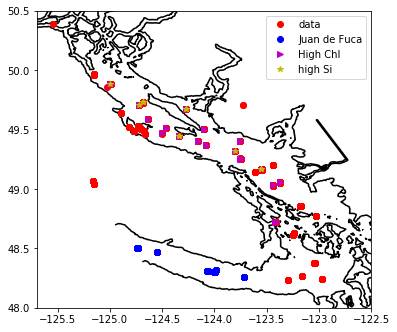

In [7]:
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(data['Lon'], data['Lat'], 'ro',label='data')
ax.plot(data.loc[(data.Lon < -123.5) & (data.Lat < 48.6),['Lon']], 
        data.loc[(data.Lon < -123.5) & (data.Lat < 48.6),['Lat']], 
        'bo', label = 'Juan de Fuca')
ax.plot(data.loc[data.Chlorophyll_Extracted>10,['Lon']],data.loc[data.Chlorophyll_Extracted>10,['Lat']],'m>',label='High Chl')

ax.plot(data.loc[data.Si>75,['Lon']],data.loc[data.Si>75,['Lat']],'*',color='y',label='high Si')
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48, 50.5)
ax.legend()
ax.set_xlim(-125.7, -122.5);

# Nitrate

In [8]:
N_s, modmean_s, obsmean_s, bias_s, RMSE_s, WSS_s = et.stats(data.loc[data.Z<15,['N']],data.loc[data.Z<15,['mod_nitrate']])
N_i, modmean_i, obsmean_i, bias_i, RMSE_i, WSS_i = et.stats(data.loc[(data.Z>=15)&(data.Z<22),['N']],data.loc[(data.Z>=15)&(data.Z<22),['mod_nitrate']])
N_d, modmean_d, obsmean_d, bias_d, RMSE_d, WSS_d = et.stats(data.loc[data.Z>=22,['N']],data.loc[data.Z>=22,['mod_nitrate']])
N, modmean, obsmean, bias, RMSE, WSS = et.stats(data.loc[:,['N']],data.loc[:,['mod_nitrate']])
print('Nitrate')
print('z<15 m:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N_s,bias_s,RMSE_s,WSS_s))
print('15 m<=z<22 m:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N_i,bias_i,RMSE_i,WSS_i))
print('z>=22 m:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N_d,bias_d,RMSE_d,WSS_d))
print('all:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N,bias,RMSE,WSS))


Nitrate
z<15 m:
  N: 508
  bias: 1.2113220931539725
  RMSE: 6.090189110157295
  WSS: 0.8374325108083196
15 m<=z<22 m:
  N: 137
  bias: -0.2111891811955644
  RMSE: 3.848107346212496
  WSS: 0.840335696562985
z>=22 m:
  N: 945
  bias: -0.7398871854348137
  RMSE: 2.60958327735408
  WSS: 0.8932722233386768
all:
  N: 1590
  bias: -0.07092747467765648
  RMSE: 4.144101693796513
  WSS: 0.9233951306226832


(0, 40)

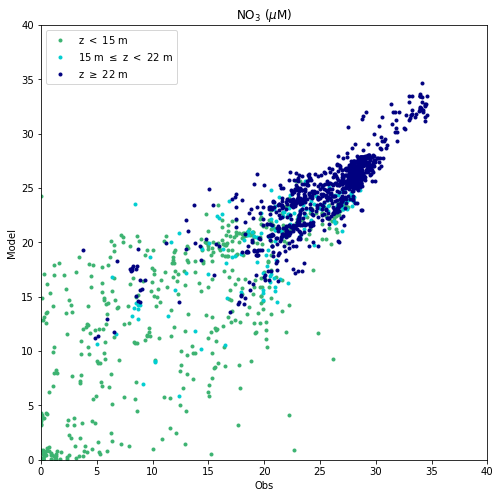

In [9]:
fig, ax = plt.subplots(figsize = (8,8))
ps=et.varvarPlot(ax,data,'N','mod_nitrate','Z',(15,22),'z','m',('mediumseagreen','darkturquoise','navy'))
ax.legend(handles=ps)
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('NO$_3$ ($\mu$M)')
ax.set_xlim(0,40)
ax.set_ylim(0,40)

Nitrate, z<15
Feb-Mar:
  N: 42
  bias: -2.6586669803801044
  RMSE: 3.66443870503592
  WSS: 0.822521853162797
April:
  N: 185
  bias: 5.873819108705263
  RMSE: 7.357241031043106
  WSS: 0.6425055717103092
May-Jun:
  N: 184
  bias: -1.5109282142288345
  RMSE: 4.70591926373496
  WSS: 0.878823516374291
Sep-Oct:
  N: 97
  bias: -0.8415474968472694
  RMSE: 6.571788874074704
  WSS: 0.7860773466833236


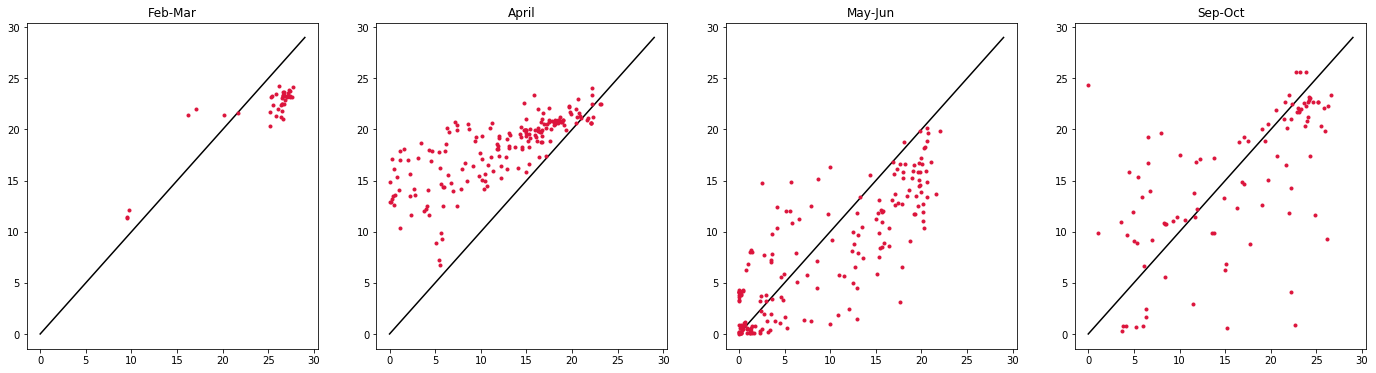

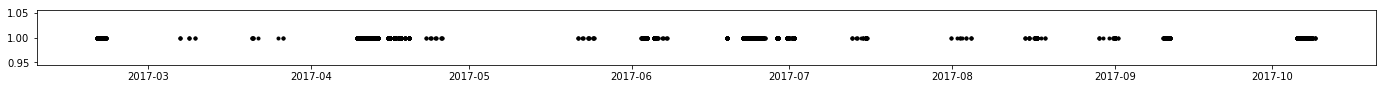

In [10]:
fig, ax = plt.subplots(1,4,figsize = (24,6))
yy=data.dtUTC[0].year
for axi in ax:
    axi.plot(np.arange(0,30),np.arange(0,30),'k-')
ps=et.varvarPlot(ax[0],data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[0].set_title('Feb-Mar')
ii1=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,5,1))&(data.dtUTC>dt.datetime(yy,4,1))
ps=et.varvarPlot(ax[1],data.loc[ii1,:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[1].set_title('April')
ii2=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,9,1))&(data.dtUTC>dt.datetime(yy,5,1))
ps=et.varvarPlot(ax[2],data.loc[ii2,:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[2].set_title('May-Jun')
ii3=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,12,1))&(data.dtUTC>dt.datetime(yy,9,1))
ps=et.varvarPlot(ax[3],data.loc[ii3,:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[3].set_title('Sep-Oct')

#ii4=(data.Z < 15)&(data.dtUTC<=dt.datetime(2016,4,1))&(data.dtUTC>dt.datetime(2016,2,1))
#ps=et.varvarPlot(ax[0],data.loc[ii4,:],obsvar,modvar,cols=('darkturquoise','navy'))
#ii5=(data.Z < 15)&(data.dtUTC<=dt.datetime(2016,5,1))&(data.dtUTC>dt.datetime(2016,4,1))
#ps=et.varvarPlot(ax[1],data.loc[ii5,:],obsvar,modvar,cols=('darkturquoise','navy'))

print('Nitrate, z<15')
print('Feb-Mar:')
et.printstats(data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],'N','mod_nitrate')
print('April:')
et.printstats(data.loc[ii1,:],'N','mod_nitrate')
print('May-Jun:')
et.printstats(data.loc[ii2,:],'N','mod_nitrate')
print('Sep-Oct:')
et.printstats(data.loc[ii3,:],'N','mod_nitrate')
fig,ax=plt.subplots(1,1,figsize=(24,1))
plt.plot(data.dtUTC,np.ones(np.shape(data.dtUTC)),'k.')

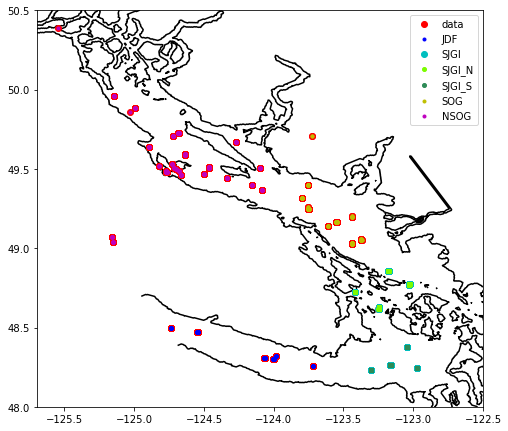

In [11]:
fig, ax = plt.subplots(figsize = (8,8))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(data['Lon'], data['Lat'], 'ro',label='data')
dJDF=data.loc[(data.Lon<-123.6)&(data.Lat<48.6)]
ax.plot(dJDF['Lon'],dJDF['Lat'],'b.',label='JDF')
dSJGI=data.loc[(data.Lon>=-123.6)&(data.Lat<48.9)]
ax.plot(dSJGI['Lon'],dSJGI['Lat'],'c.',label='SJGI',ms=12)
dSJGI_N=data.loc[(data.Lon>=-123.6)&(data.Lat<48.9)&(data.Lat>48.5)]
ax.plot(dSJGI_N['Lon'],dSJGI_N['Lat'],'.',color='lawngreen',label='SJGI_N',ms=8)
dSJGI_S=data.loc[(data.Lon>=-123.6)&(data.Lat<48.5)]
ax.plot(dSJGI_S['Lon'],dSJGI_S['Lat'],'.',color='seagreen',label='SJGI_S',ms=8)
dSOG=data.loc[(data.Lat>=48.9)&(data.Lon>-124.0)]
ax.plot(dSOG['Lon'],dSOG['Lat'],'y.',label='SOG')
dNSOG=data.loc[(data.Lat>=48.9)&(data.Lon<=-124.0)]
ax.plot(dNSOG['Lon'],dNSOG['Lat'],'m.',label='NSOG')
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48, 50.5)
ax.legend()
ax.set_xlim(-125.7, -122.5);

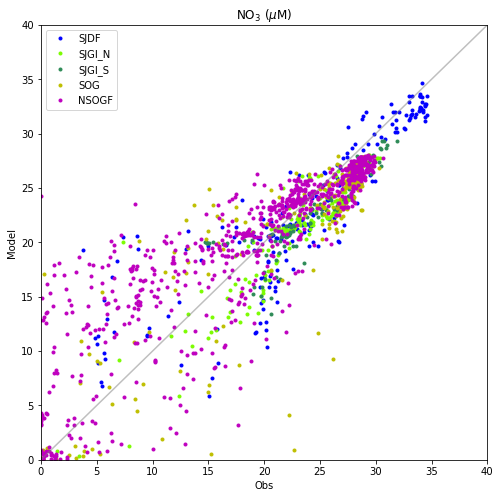

In [12]:
fig, ax = plt.subplots(figsize = (8,8))
ps1=et.varvarPlot(ax,dJDF,'N','mod_nitrate',cols=('b','darkturquoise','navy'),lname='SJDF')
ps2=et.varvarPlot(ax,dSJGI_N,'N','mod_nitrate',cols=('lawngreen','darkturquoise','navy'),lname='SJGI_N')
ps3=et.varvarPlot(ax,dSJGI_S,'N','mod_nitrate',cols=('seagreen','darkturquoise','navy'),lname='SJGI_S')
ps4=et.varvarPlot(ax,dSOG,'N','mod_nitrate',cols=('y','darkturquoise','navy'),lname='SOG')
ps5=et.varvarPlot(ax,dNSOG,'N','mod_nitrate',cols=('m','darkturquoise','navy'),lname='NSOGF')
ax.legend(handles=[ps1[0][0],ps2[0][0],ps3[0][0],ps4[0][0],ps5[0][0]])
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('NO$_3$ ($\mu$M)')
ax.set_xlim(0,40)
ax.set_ylim(0,40)
ax.plot((0,40),(0,40),'-',color='grey',alpha=.5)

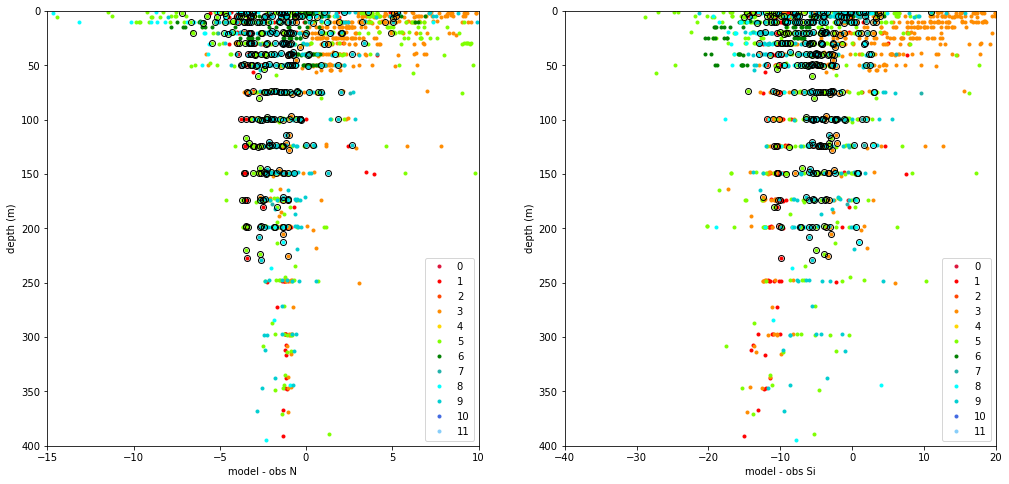

In [13]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_nitrate']].values-data.loc[iii,['N']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_silicon']].values-data.loc[iii,['Si']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model - obs N')
ax[0].set_xlim(-15,10)
ax[1].set_xlabel('model - obs Si')
ax[1].set_xlim(-40,20)
ax[0].plot(dSJGI['mod_nitrate']-dSJGI['N'],dSJGI['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dSJGI['mod_silicon']-dSJGI['Si'],dSJGI['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

# Silicate

In [14]:
print('Si')
print('z<15 m:')
et.printstats(data.loc[data.Z<15,:],'Si','mod_silicon')
print('15 m<=z<22 m:')
et.printstats(data.loc[(data.Z>=15)&(data.Z<22),:],'Si','mod_silicon')
print('z>=22 m:')
et.printstats(data.loc[data.Z>=22,:],'Si','mod_silicon')
print('all:')
et.printstats(data,'Si','mod_silicon')
print('obs Si < 50:')
et.printstats(data.loc[data.Si<50,:],'Si','mod_silicon')

Si
z<15 m:
  N: 508
  bias: 1.4227657385041468
  RMSE: 13.48131956302833
  WSS: 0.645899584509458
15 m<=z<22 m:
  N: 137
  bias: -3.8970022279502743
  RMSE: 10.380391964004595
  WSS: 0.6846218822222623
z>=22 m:
  N: 944
  bias: -5.308336366556453
  RMSE: 8.632125583877741
  WSS: 0.776741838944599
all:
  N: 1589
  bias: -3.034734952862415
  RMSE: 10.566993416954194
  WSS: 0.7817486063283335
obs Si < 50:
  N: 1042
  bias: 0.21155708620965186
  RMSE: 10.768832208595724
  WSS: 0.6609212676197433


(0, 80)

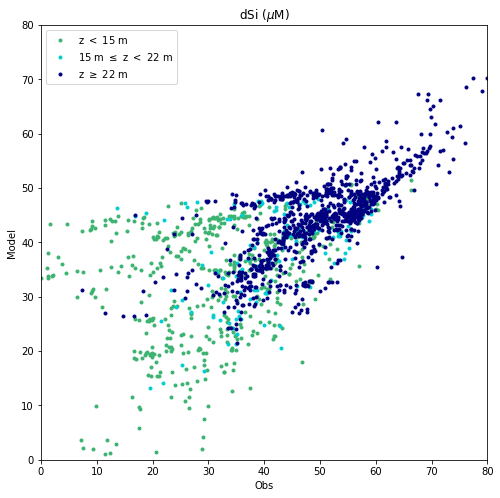

In [15]:
fig, ax = plt.subplots(figsize = (8,8))
ps=et.varvarPlot(ax,data,'Si','mod_silicon','Z',(15,22),'z','m',('mediumseagreen','darkturquoise','navy'))
ax.legend(handles=ps)
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('dSi ($\mu$M)')
ax.set_xlim(0,80)
ax.set_ylim(0,80)

Silicate, z<15
Feb-Mar:
  N: 42
  bias: -8.493062747773664
  RMSE: 9.460564840344214
  WSS: 0.7717478911711054
April:
  N: 185
  bias: 14.713638301127663
  RMSE: 18.140677856872095
  WSS: 0.4785427010010611
May-Jun:
  N: 184
  bias: -6.801597167901374
  RMSE: 10.337685894803064
  WSS: 0.6915259686847324
Sep-Oct:
  N: 97
  bias: -4.031500786063596
  RMSE: 9.094928164772476
  WSS: 0.5028363584078936


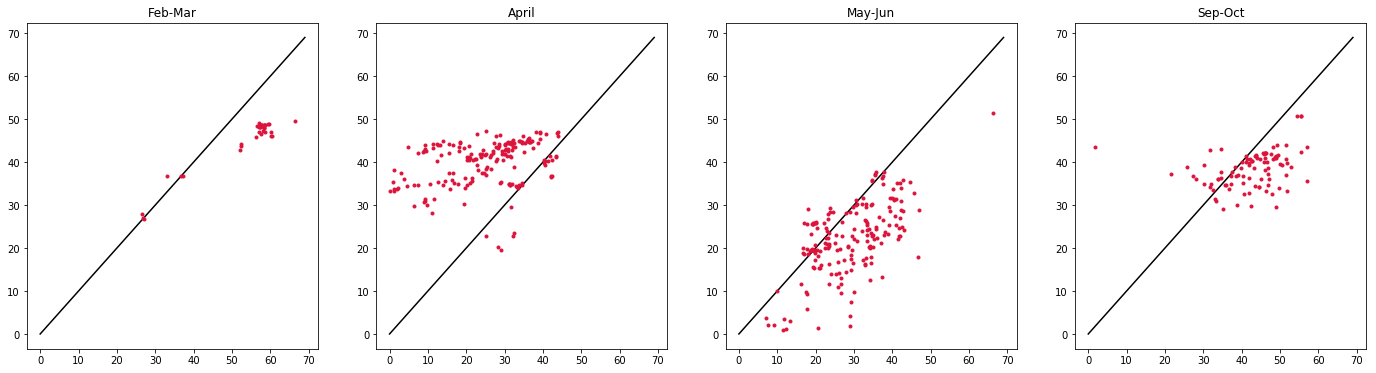

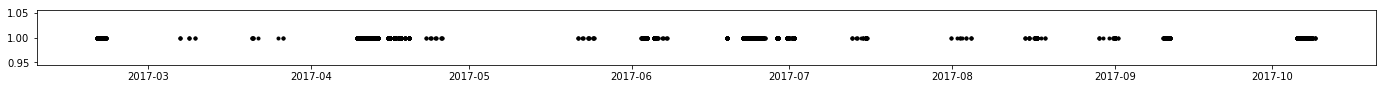

In [16]:
obsvar='Si'; modvar='mod_silicon'
fig, ax = plt.subplots(1,4,figsize = (24,6))
for axi in ax:
    axi.plot(np.arange(0,70),np.arange(0,70),'k-')
ps=et.varvarPlot(ax[0],data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[0].set_title('Feb-Mar')
ii1=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,5,1))&(data.dtUTC>dt.datetime(yy,4,1))
ps=et.varvarPlot(ax[1],data.loc[ii1,:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[1].set_title('April')
ii2=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,9,1))&(data.dtUTC>dt.datetime(yy,5,1))
ps=et.varvarPlot(ax[2],data.loc[ii2,:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[2].set_title('May-Jun')
ii3=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,12,1))&(data.dtUTC>dt.datetime(yy,9,1))
ps=et.varvarPlot(ax[3],data.loc[ii3,:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[3].set_title('Sep-Oct')

print('Silicate, z<15')
print('Feb-Mar:')
et.printstats(data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],obsvar,modvar)
print('April:')
et.printstats(data.loc[ii1,:],obsvar,modvar)
print('May-Jun:')
et.printstats(data.loc[ii2,:],obsvar,modvar)
print('Sep-Oct:')
et.printstats(data.loc[ii3,:],obsvar,modvar)
fig,ax=plt.subplots(1,1,figsize=(24,1))
plt.plot(data.dtUTC,np.ones(np.shape(data.dtUTC)),'k.')

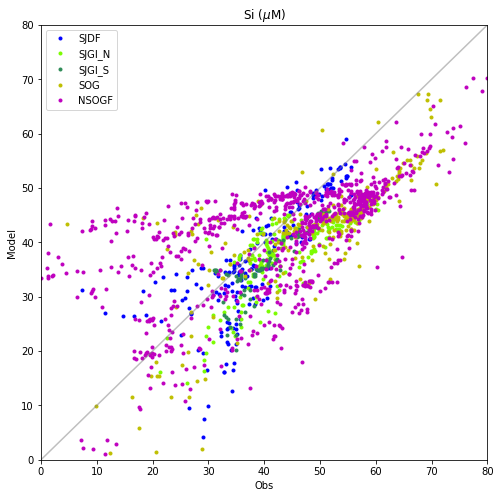

In [17]:
fig, ax = plt.subplots(figsize = (8,8))
ps1=et.varvarPlot(ax,dJDF,obsvar,modvar,cols=('b','darkturquoise','navy'),lname='SJDF')
ps2=et.varvarPlot(ax,dSJGI_N,obsvar,modvar,cols=('lawngreen','darkturquoise','navy'),lname='SJGI_N')
ps3=et.varvarPlot(ax,dSJGI_S,obsvar,modvar,cols=('seagreen','darkturquoise','navy'),lname='SJGI_S')
ps4=et.varvarPlot(ax,dSOG,obsvar,modvar,cols=('y','darkturquoise','navy'),lname='SOG')
ps5=et.varvarPlot(ax,dNSOG,obsvar,modvar,cols=('m','darkturquoise','navy'),lname='NSOGF')
ax.legend(handles=[ps1[0][0],ps2[0][0],ps3[0][0],ps4[0][0],ps5[0][0]])
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('Si ($\mu$M)')
ax.set_xlim(0,80)
ax.set_ylim(0,80)
ax.plot((0,80),(0,80),'-',color='grey',alpha=.5)

# Ratios

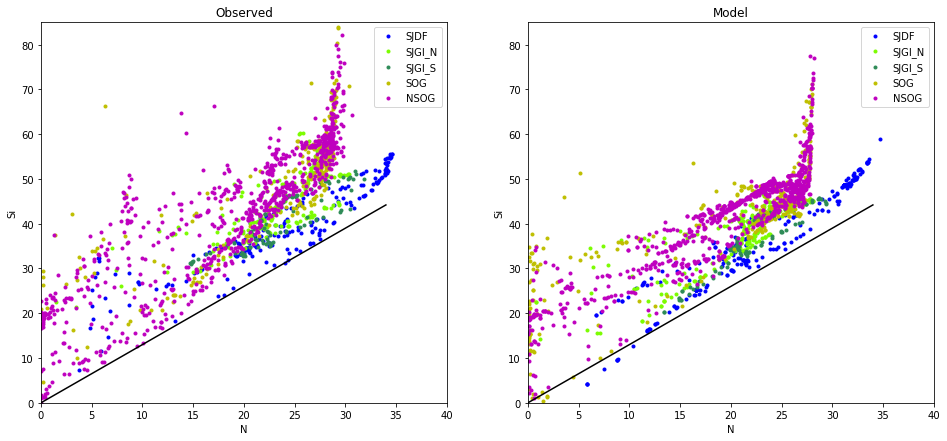

In [18]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
p1=ax[0].plot(dJDF['N'],dJDF['Si'],'b.',label='SJDF')
p2=ax[0].plot(dSJGI_N['N'],dSJGI_N['Si'],'.',color='lawngreen',label='SJGI_N')
p2=ax[0].plot(dSJGI_S['N'],dSJGI_S['Si'],'.',color='seagreen',label='SJGI_S')
p3=ax[0].plot(dSOG['N'],dSOG['Si'],'y.',label='SOG')
p4=ax[0].plot(dNSOG['N'],dNSOG['Si'],'m.',label='NSOG')
ax[0].set_title('Observed')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Si')
ax[0].set_xlim(0,40)
ax[0].set_ylim(0,85)
ax[0].legend()

p5=ax[1].plot(dJDF['mod_nitrate'],dJDF['mod_silicon'],'b.',label='SJDF')
p6=ax[1].plot(dSJGI_N['mod_nitrate'],dSJGI_N['mod_silicon'],'.',color='lawngreen',label='SJGI_N')
p6=ax[1].plot(dSJGI_S['mod_nitrate'],dSJGI_S['mod_silicon'],'.',color='seagreen',label='SJGI_S')
p7=ax[1].plot(dSOG['mod_nitrate'],dSOG['mod_silicon'],'y.',label='SOG')
p8=ax[1].plot(dNSOG['mod_nitrate'],dNSOG['mod_silicon'],'m.',label='NSOG')
ax[1].set_title('Model')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Si')
ax[1].set_xlim(0,40)
ax[1].set_ylim(0,85)
ax[1].legend()
ax[0].plot(np.arange(0,35),1.3*np.arange(0,35),'k-')
ax[1].plot(np.arange(0,35),1.3*np.arange(0,35),'k-')

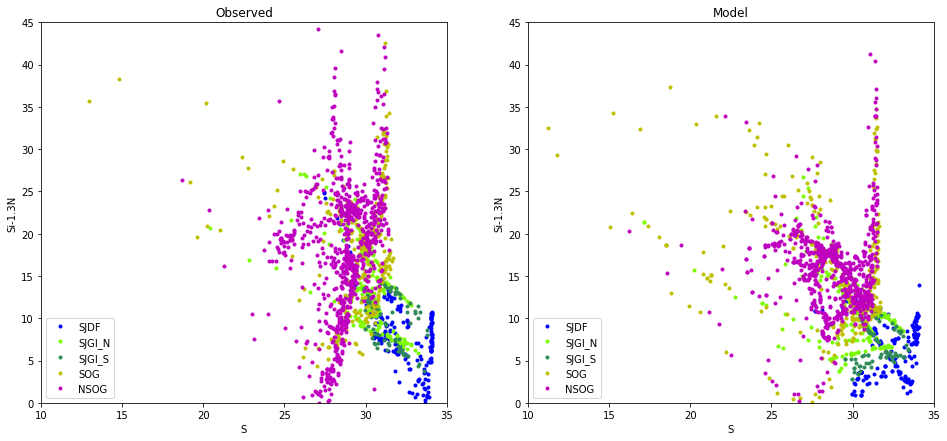

In [19]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
p1=ax[0].plot(dJDF['AbsSal'], dJDF['Si']-1.3*dJDF['N'],'b.',label='SJDF')
p2=ax[0].plot(dSJGI_N['AbsSal'],dSJGI_N['Si']-1.3*dSJGI_N['N'],'.',color='lawngreen',label='SJGI_N')
p2=ax[0].plot(dSJGI_S['AbsSal'],dSJGI_S['Si']-1.3*dSJGI_S['N'],'.',color='seagreen',label='SJGI_S')
p3=ax[0].plot(dSOG['AbsSal'],dSOG['Si']-1.3*dSOG['N'],'y.',label='SOG')
p4=ax[0].plot(dNSOG['AbsSal'],dNSOG['Si']-1.3*dNSOG['N'],'m.',label='NSOG')
ax[0].set_title('Observed')
ax[0].set_xlabel('S')
ax[0].set_ylabel('Si-1.3N')
ax[0].set_xlim(10,35)
ax[0].set_ylim(0,45)
ax[0].legend()

p5=ax[1].plot(dJDF['mod_vosaline'],dJDF['mod_silicon']-1.3*dJDF['mod_nitrate'],'b.',label='SJDF')
p6=ax[1].plot(dSJGI_N['mod_vosaline'],dSJGI_N['mod_silicon']-1.3*dSJGI_N['mod_nitrate'],'.',color='lawngreen',label='SJGI_N')
p6=ax[1].plot(dSJGI_S['mod_vosaline'],dSJGI_S['mod_silicon']-1.3*dSJGI_S['mod_nitrate'],'.',color='seagreen',label='SJGI_S')
p7=ax[1].plot(dSOG['mod_vosaline'],dSOG['mod_silicon']-1.3*dSOG['mod_nitrate'],'y.',label='SOG')
p8=ax[1].plot(dNSOG['mod_vosaline'],dNSOG['mod_silicon']-1.3*dNSOG['mod_nitrate'],'m.',label='NSOG')
ax[1].set_title('Model')
ax[1].set_xlabel('S')
ax[1].set_ylabel('Si-1.3N')
ax[1].set_xlim(10,35)
ax[1].set_ylim(0,45)
ax[1].legend()

In [20]:
data.loc[data.Si>65,['Month','Lat','Lon','Z','Si']]

,Month,Lat,Lon,Z,Si
80,2.0,49.027667,-123.437833,297.5,66.85
81,2.0,49.027667,-123.437833,311.8,67.82
97,2.0,49.163167,-123.551000,347.1,66.29
98,2.0,49.163167,-123.551000,367.2,68.34
109,2.0,49.250833,-123.749000,390.9,72.03
140,2.0,49.402000,-124.155167,272.6,65.08
153,2.0,49.466500,-124.499500,316.1,69.51
169,2.0,49.730000,-124.685000,347.9,68.70
184,2.0,49.885333,-124.995333,307.2,66.13
185,2.0,49.483667,-124.766667,0.6,66.38


# Chlorophyll

In [21]:
data['l10_obsChl']=np.log10(data['Chlorophyll_Extracted']+0.01)
data['l10_modChl']=np.log10(2*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])+0.01)
data['mod_Chl']=2*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])

In [22]:
print('log10[Chl+0.01]')
print('z<15 m:')
et.printstats(data.loc[data.Z<15,:],'l10_obsChl','l10_modChl')
print('z>=15 m:')
et.printstats(data.loc[data.Z>=15,:],'l10_obsChl','l10_modChl')
print('all:')
et.printstats(data,'l10_obsChl','l10_modChl')
print('\n')
print('Chl')
print('z<15 m:')
et.printstats(data.loc[data.Z<15,:],'Chlorophyll_Extracted','mod_Chl')
print('z>=15 m:')
et.printstats(data.loc[data.Z>=15,:],'Chlorophyll_Extracted','mod_Chl')
print('all:')
et.printstats(data,'Chlorophyll_Extracted','mod_Chl')


log10[Chl+0.01]
z<15 m:
  N: 311
  bias: -0.11700503305306059
  RMSE: 0.5655662801176755
  WSS: 0.5144233925198186
z>=15 m:
  N: 119
  bias: -0.0887848747493695
  RMSE: 0.4799791983996992
  WSS: 0.5432958404390482
all:
  N: 430
  bias: -0.10919526831320184
  RMSE: 0.5432317297044045
  WSS: 0.6177903567885508


Chl
z<15 m:
  N: 311
  bias: -1.5401109217505096
  RMSE: 5.6063599322728805
  WSS: 0.418705849132346
z>=15 m:
  N: 119
  bias: -0.5528137377690602
  RMSE: 1.81099871714268
  WSS: 0.4244455767155836
all:
  N: 430
  bias: -1.2668821661835499
  RMSE: 4.862148951091045
  WSS: 0.4527904615151468


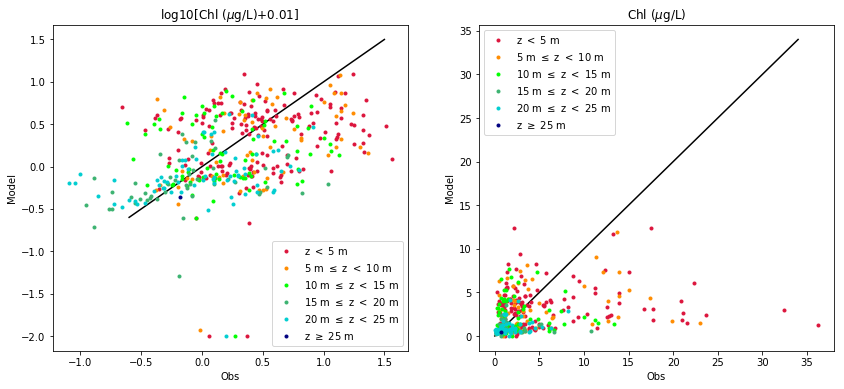

In [23]:
fig, ax = plt.subplots(1,2,figsize = (14,6))
ax[0].plot(np.arange(-.6,1.6,.1),np.arange(-.6,1.6,.1),'k-')
ps=et.varvarPlot(ax[0],data,'l10_obsChl','l10_modChl','Z',(5,10,15,20,25),'z','m',('crimson','darkorange','lime','mediumseagreen','darkturquoise','navy'))
ax[0].legend(handles=ps)
ax[0].set_xlabel('Obs')
ax[0].set_ylabel('Model')
ax[0].set_title('log10[Chl ($\mu$g/L)+0.01]')
ax[1].plot(np.arange(0,35),np.arange(0,35),'k-')
ps=et.varvarPlot(ax[1],data,'Chlorophyll_Extracted','mod_Chl','Z',(5,10,15,20,25),'z','m',('crimson','darkorange','lime','mediumseagreen','darkturquoise','navy'))
ax[1].legend(handles=ps)
ax[1].set_xlabel('Obs')
ax[1].set_ylabel('Model')
ax[1].set_title('Chl ($\mu$g/L)')

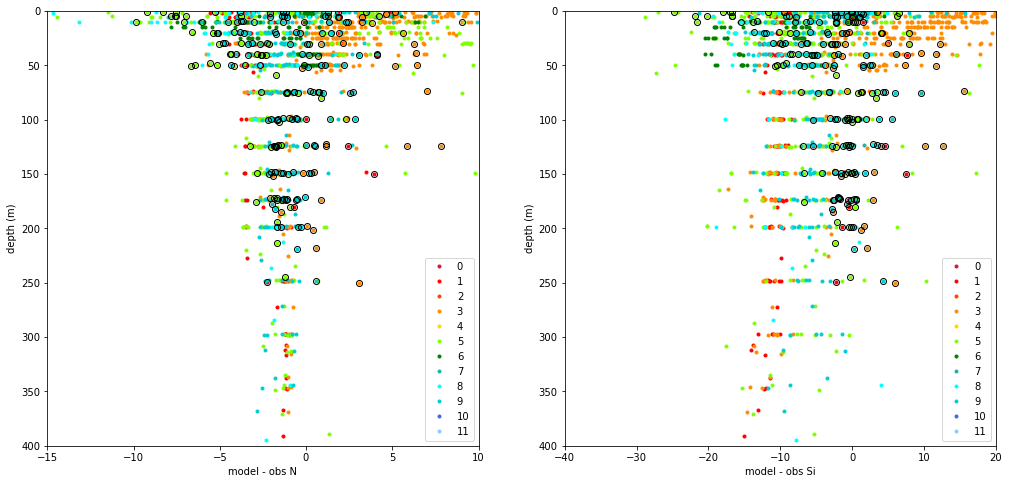

In [28]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_nitrate']].values-data.loc[iii,['N']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_silicon']].values-data.loc[iii,['Si']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model - obs N')
ax[0].set_xlim(-15,10)
ax[1].set_xlabel('model - obs Si')
ax[1].set_xlim(-40,20)
ax[0].plot(dJDF['mod_nitrate']-dJDF['N'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_silicon']-dJDF['Si'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

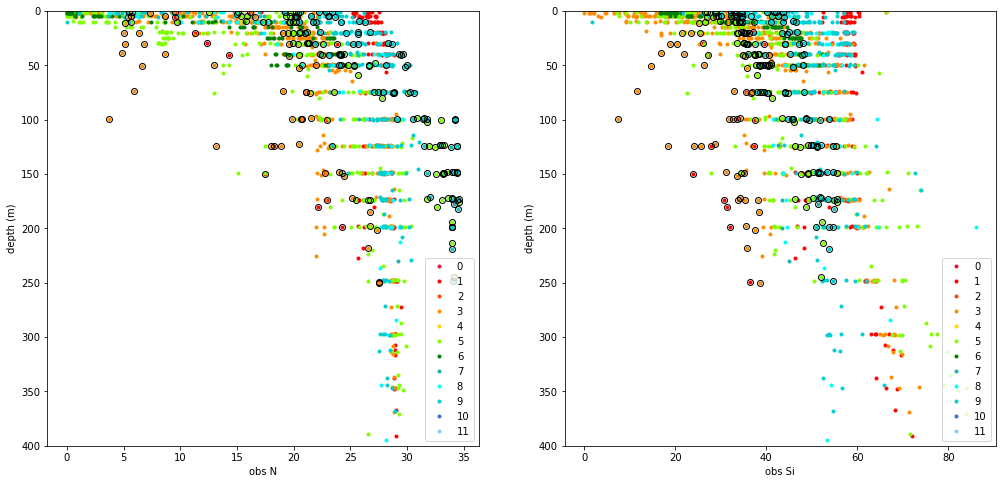

In [29]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['N']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['Si']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('obs N')
#ax[0].set_xlim(-15,10)
ax[1].set_xlabel('obs Si')
#ax[1].set_xlim(-40,20)
ax[0].plot(dJDF['N'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['Si'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

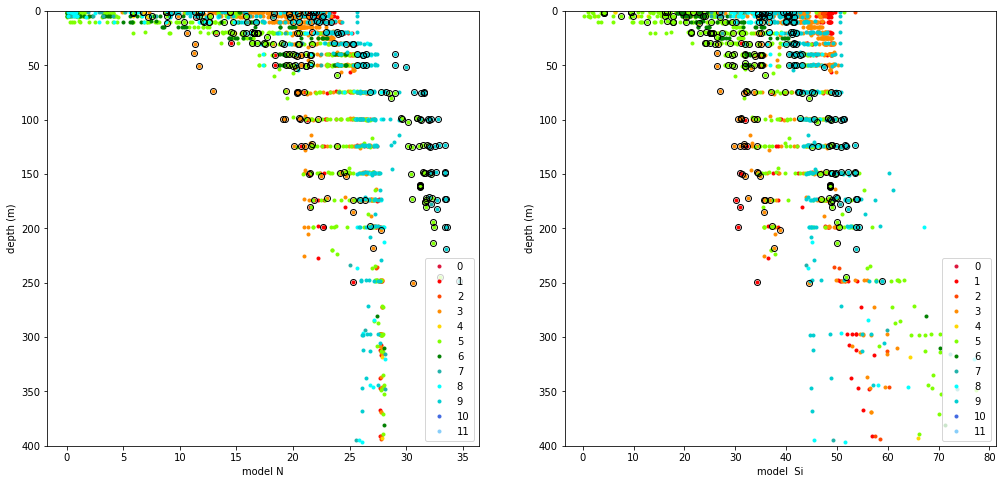

In [30]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_nitrate']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_silicon']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model N')
ax[1].set_xlabel('model  Si')
ax[0].plot(dJDF['mod_nitrate'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_silicon'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

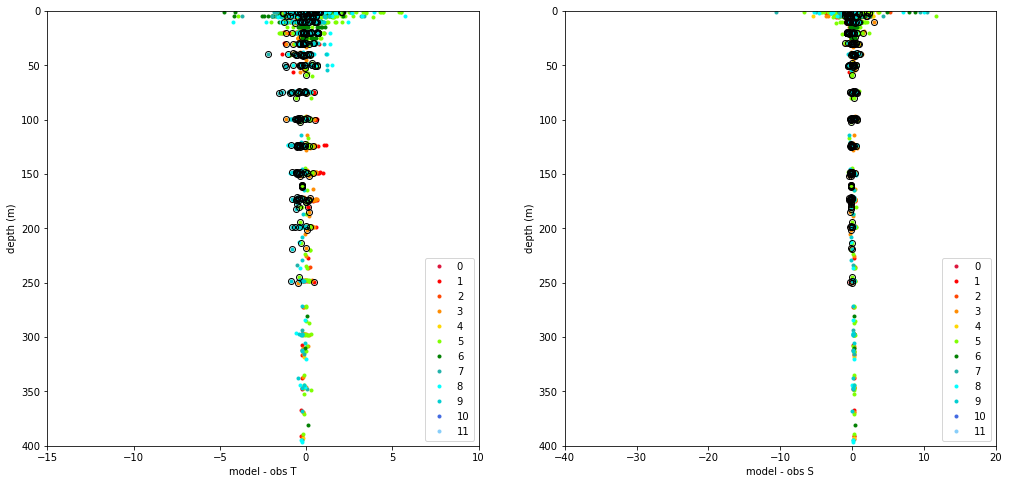

In [31]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_votemper']].values-data.loc[iii,['ConsT']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_vosaline']].values-data.loc[iii,['AbsSal']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model - obs T')
ax[0].set_xlim(-15,10)
ax[1].set_xlabel('model - obs S')
ax[1].set_xlim(-40,20)
ax[0].plot(dJDF['mod_votemper']-dJDF['ConsT'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_vosaline']-dJDF['AbsSal'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

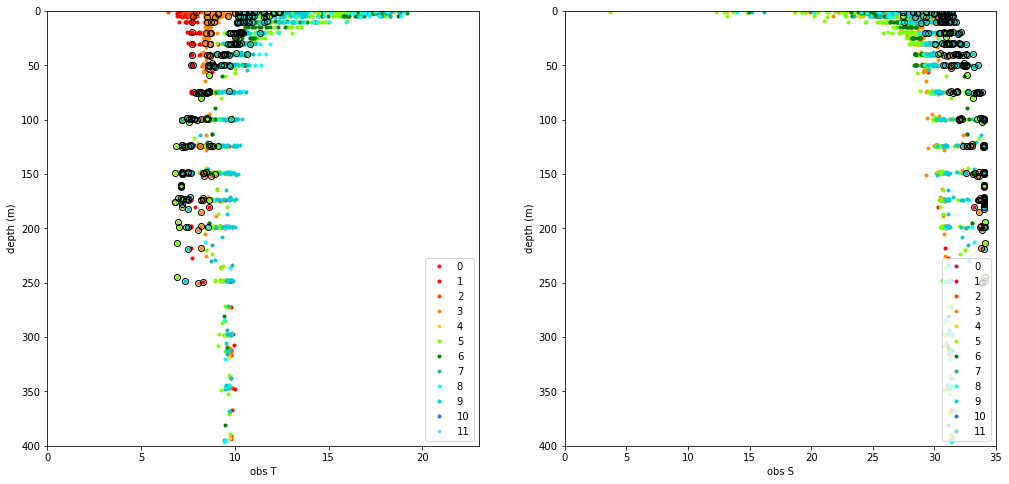

In [32]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['ConsT']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['AbsSal']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('obs T')
ax[0].set_xlim(0,23)
ax[1].set_xlabel('obs S')
ax[1].set_xlim(0,35)
ax[0].plot(dJDF['ConsT'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['AbsSal'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

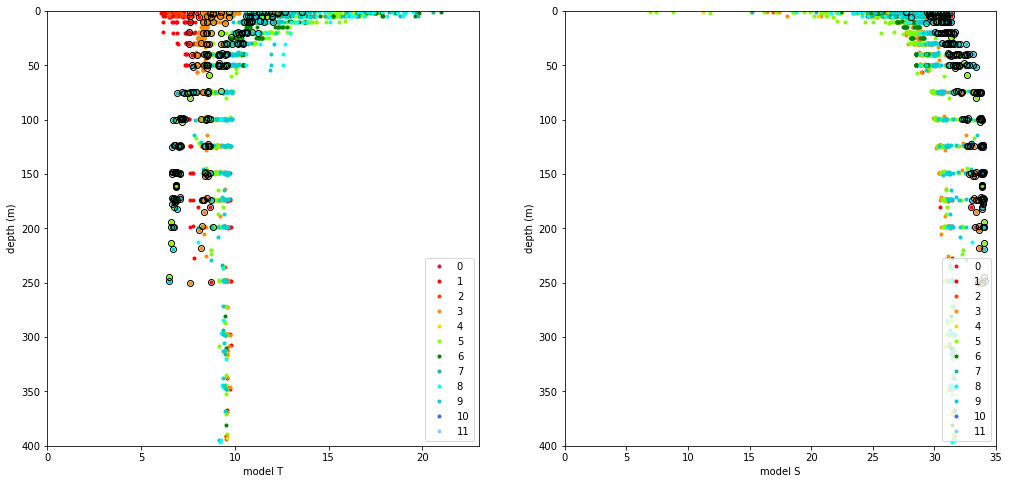

In [33]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_votemper']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_vosaline']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model T')
ax[0].set_xlim(0,23)
ax[1].set_xlabel('model S')
ax[1].set_xlim(0,35)
ax[0].plot(dJDF['mod_votemper'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_vosaline'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')